In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
shop = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202403.csv",
                   encoding="utf-8")  # 한글이 깨질경우, 'utf-8','cp949','euc_kr'

print(shop.shape)
shop.head(2)

(475236, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708


In [7]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
shop.loc[10]

lst_name = []
for name in shop["표준산업분류명"].unique():
    if '커피' in str(name):
        lst_name.append(name)
        
lst_name        

['커피 전문점', '커피 및 차류 도매업']

In [ ]:
shop.shape
shop.head(1)
shop.loc[0]

In [20]:
## 커피 업종인 것만 발췌 :

shop_coffee = shop[shop["표준산업분류명"] == '커피 전문점']
print(shop_coffee.shape)

(18618, 39)


In [21]:
shop_coffee["상호명"].unique()
shop_coffee["상호명"].value_counts()

상호명
투썸플레이스      74
이디야         70
이디야커피       70
메가엠지씨커피     51
매머드익스프레스    44
            ..
팜스프링스        1
케플러452b      1
카페엘카미노       1
카페구름운        1
보광동커피        1
Name: count, Length: 16241, dtype: int64

In [25]:
shop_coffee[shop_coffee["상호명"].str.contains("이디야")]
shop_coffee_idy = shop_coffee[shop_coffee["상호명"].str.contains("이디야")]
print(shop_coffee_idy.shape)

(527, 39)


In [26]:
shop_coffee_idy["상호명"].value_counts()

상호명
이디야              70
이디야커피            70
이디야구로             5
이디야신림             3
이디야커피점            2
                 ..
이디야관악농협하나로마트점     1
이디야커피창동하나로마트점     1
이디야고덕교차로          1
이디야에스프레소신설점       1
이디야길음뉴타운점         1
Name: count, Length: 376, dtype: int64

In [44]:
shop_coffee_idy.loc[1416]

상가업소번호            MA010120220805478457
상호명                         이디야뚝섬유원지역점
지점명                                NaN
상권업종대분류코드                           I2
상권업종대분류명                            음식
상권업종중분류코드                         I212
상권업종중분류명                         비알코올 
상권업종소분류코드                       I21201
상권업종소분류명                            카페
표준산업분류코드                        I56221
표준산업분류명                         커피 전문점
시도코드                                11
시도명                              서울특별시
시군구코드                            11215
시군구명                               광진구
행정동코드                         11215847
행정동명                              자양4동
법정동코드                       1121510500
법정동명                               자양동
지번코드               1121510500100650001
대지구분코드                               1
대지구분명                               대지
지번본번지                               65
지번부번지                              1.0
지번주소                서울특별시 광진구 자양동 65-1
도로명코드                    

In [34]:
shop_coffee_idy["시군구명"].value_counts()

시군구명
영등포구    36
송파구     29
강남구     29
강서구     28
종로구     26
마포구     25
중구      25
중랑구     25
성북구     24
서초구     23
구로구     23
은평구     21
관악구     21
동작구     19
동대문구    19
도봉구     19
강동구     19
노원구     18
양천구     17
광진구     16
성동구     15
서대문구    15
금천구     13
용산구     11
강북구     11
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='시군구명'>

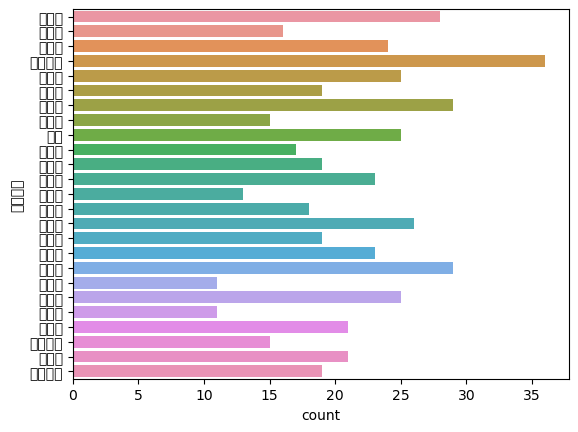

In [65]:
sns.countplot(shop_coffee_idy, y='시군구명')

In [ ]:
!pip install folium

In [36]:
import folium

In [43]:
map1 = folium.Map(location=[37.52,126.9071])
folium.Marker(location=[37.52,126.9071],
              tooltip="Hello", popup="Timberline Lodge").add_to(map1)

map1

In [54]:
a = shop_coffee_idy['위도'].mean()
b = shop_coffee_idy['경도'].mean()

map2 = folium.Map(location=[a,b])
map2

In [57]:
shop_coffee_idy.loc[186]

상가업소번호            MA010120220805434517
상호명                           이디야까치산로점
지점명                                NaN
상권업종대분류코드                           I2
상권업종대분류명                            음식
상권업종중분류코드                         I212
상권업종중분류명                         비알코올 
상권업종소분류코드                       I21201
상권업종소분류명                            카페
표준산업분류코드                        I56221
표준산업분류명                         커피 전문점
시도코드                                11
시도명                              서울특별시
시군구코드                            11500
시군구명                               강서구
행정동코드                         11500591
행정동명                              화곡6동
법정동코드                       1150010300
법정동명                               화곡동
지번코드               1150010300111670000
대지구분코드                               1
대지구분명                               대지
지번본번지                             1167
지번부번지                              NaN
지번주소                서울특별시 강서구 화곡동 1167
도로명코드                    

In [58]:
shop_coffee_idy[['경도', '위도']]
shop_coffee_idy.loc[186,'위도']

for idx in shop_coffee_idy.index:
    l = shop_coffee_idy.loc[idx,'위도']
    m = shop_coffee_idy.loc[idx,'경도']
    t = shop_coffee_idy.loc[idx,'상호명']
    folium.Marker(location=[l,m], tooltip=t).add_to(map2)
    
map2    

In [60]:
# MarkerCluster
from folium.plugins import MarkerCluster

In [62]:
# basis map :
a = shop_coffee_idy['위도'].mean()
b = shop_coffee_idy['경도'].mean()

map3 = folium.Map(location=[a,b])
map3

In [63]:
m_cluster = MarkerCluster().add_to(map3)

In [64]:
for idx in shop_coffee_idy.index:
    l = shop_coffee_idy.loc[idx,'위도']
    m = shop_coffee_idy.loc[idx,'경도']
    t = shop_coffee_idy.loc[idx,'상호명']
    folium.Marker(location=[l,m], tooltip=t).add_to(m_cluster)
    
map3   